In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
isolados = pd.read_csv('data/01 - geral_normalizada.csv')
isolados.sample(5)

,id,ano,ccr,amostra,coleta,latitude,longitude,data_coleta,localidade,equipe,substrato,nome_cientifico,cidade,uf
557,428,2014,7771,ANA.TAQ.001.057,ANA.TAQ.001,-10.307.444,-48.191.167,2014-11-17,Distrito de Taquaruçu (Palmas – TO),Ana Paula Guimarães,Fruto de Buriti,Mauritia flexuosa,Palmas,TO
551,563,2014,8022,ANA.TAQ.001.084,ANA.TAQ.001,-10.307.444,-48.191.167,2014-11-17,Distrito de Taquaruçu (Palmas – TO),Ana Paula Guimarães,Fruto de Buriti,Mauritia flexuosa,Palmas,TO
589,657,2015,8613,STL.CAN.001.001,STL.CAN.001,-997.865,-5.003.707,2015-01-11,"Cangucu, Pium - TO",Stella Barros,Folha de Babaçu,Attalea speciosa,Pium,TO
153,300,2014,6753,ANA.CAN.001.035,ANA.CAN.001,-9.978.136,-5.004.615,2014-01-24,Centro de Pesquisa Canguçú (Pium-TO),Ana Paula Guimarães,Fruto de Buriti,Mauritia flexuosa,Pium,TO
36,37,2015,8536,JHF.BU.002.004,JHF.BU.002,-14.681.273,-52.367.834,2015-08-10,Fazenda São Francisco,Jheferson Paulino,Fruto de Buriti,Mauritia flexuosa,Nova Xavantina,MT


In [3]:
df = pd.read_csv('data/02 - reacoes_normalizada.csv', names=['Ano','CCR','Composto','Resultado'], header=None, index_col=0)
df.sample(5)

,Ano,CCR,Composto,Resultado
397,2014,6740,10,-
98,2014,7802,19,-
99,2014,7803,43,-
634,2015,7796,26,+
250,2014,6793,2,-


In [4]:
# junta os termos em um unico identificador do isolado:
df["Isolado"] = "UFT."+df['Ano'].astype(str)+"(L)"+df['CCR'].astype(str)

# remove as colunas que não serao mais uteis:
del df['Ano']
del df['CCR']

In [5]:
# define nova coluna de indice:
df.set_index(['Isolado'], inplace=True)

In [6]:
# compostos = []
# for i in range(1,81):
#     compostos.append(i)

# compostos
df.sample(5)

,Composto,Resultado
Isolado,,
UFT.2015(L)8565,27,+
UFT.2014(L)6581,9,-
UFT.2015(L)8507,15,-
UFT.2014(L)6515,37,-
UFT.2015(L)8065,41,-


In [7]:
# converte coluna de resultados em linhas:
df = df.pivot(columns='Composto')

In [8]:
# salva estado atual do dataframe em arquivo CSV:
df.to_csv('03 - reacoes_formatadas.csv')

In [9]:
df.sample(5)

Resultado                                 ...                 \
Composto               1  2  3   4  5  6   7  8   9   10  ...   52   53   64   
Isolado                                                   ...                  
UFT.2015(L)8579       NaN  +  +  +w  +  +  -+  -  +w  +w  ...  NaN  NaN  NaN   
UFT.2014(L)7946       NaN  -  -   -  -  -   -  -   -   -  ...    +    +    -   
UFT.2015(L)8511       NaN  +  +   +  c  c   +  -   -   c  ...  NaN  NaN  NaN   
UFT.2014(L)7328       NaN  +  +   +  +  +   +  -   -   -  ...  NaN  NaN  NaN   
UFT.2014(L)7904       NaN  +  +   +  +  +   +  -   +   +  ...  NaN  NaN  NaN   

                                                    
Composto          65   66   67   68   69   78   79  
Isolado                                             
UFT.2015(L)8579  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
UFT.2014(L)7946    -    -    +    +    +    -    -  
UFT.2015(L)8511  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
UFT.2014(L)7328  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
UFT.2014(L)7904  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 57 columns]

### Análise Exploratória de Dados:
1. Informações Gerais
2. Tratamento de valores Nulos
3. 

Questions to answer:
* How many features do you have?
* How many observations do you have?
* What is the data type of each feature?

In [28]:
# dimensoes - linhas e colunas
df.shape

# informações diversas:
# df.info()

(601, 57)

In [11]:
# descricao dos dados sob analise:
df.describe(include='object')

Resultado                                               ...       \
Composto        1    2    3    4    5    6    7    8    9    10  ...   52   
count           26  600  601  601  579  600  601  598  595  599  ...  312   
unique           4    7    6    5    5    6    5    4    6    5  ...    2   
top              +    +    +    +    +    +    +    -    -    -  ...    +   
freq            10  415  404  391  404  458  385  543  375  310  ...  301   

                                                       
Composto   53   64   65   66   67   68   69   78   79  
count     308  227  312  303  242  242  199  234  226  
unique      2    2    2    2    2    3    3    2    2  
top         -    -    -    -    -    -    +    -    -  
freq      208  218  217  225  130  132  176  140  162  

[4 rows x 57 columns]

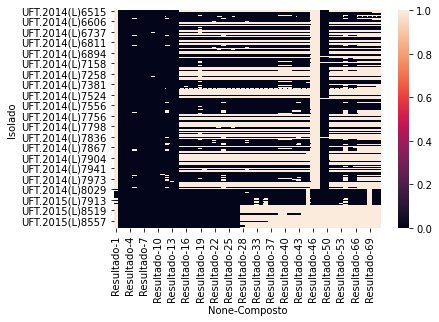

In [12]:
# mostra valores faltantes dentro de uma amostra dos dados:
sns.heatmap(df.isnull())
plt.show()

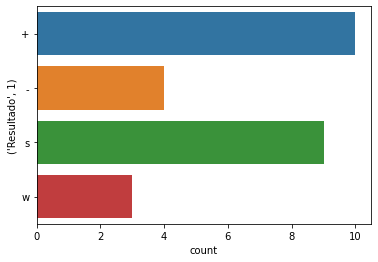

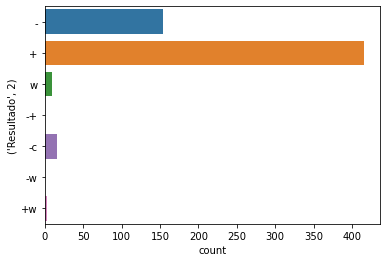

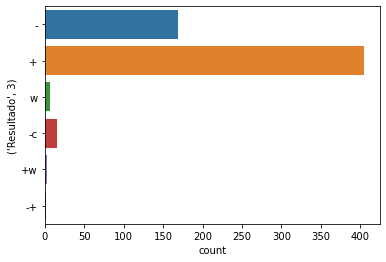

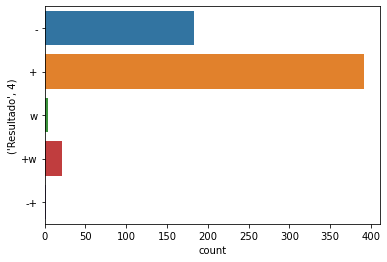

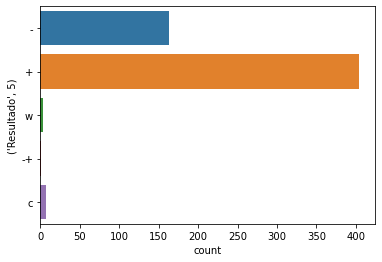

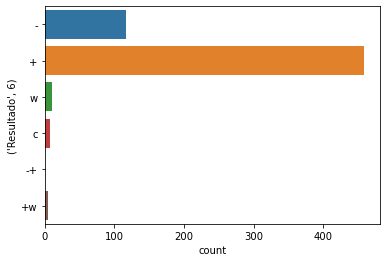

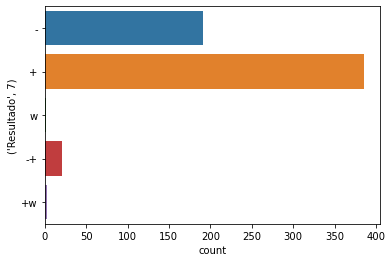

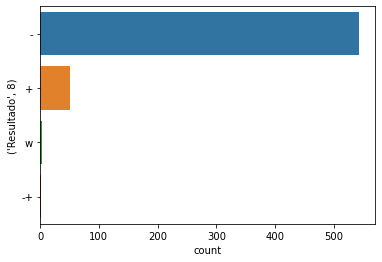

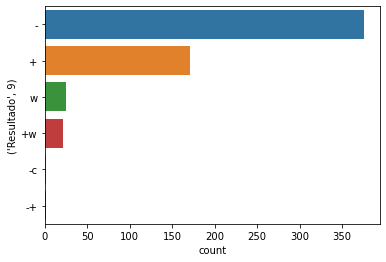

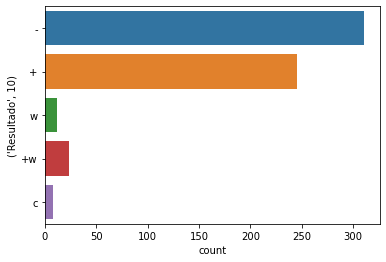

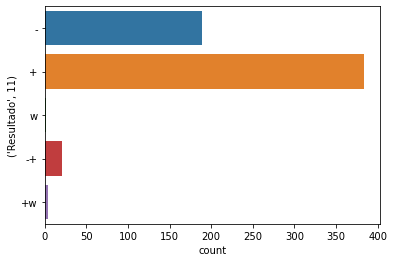

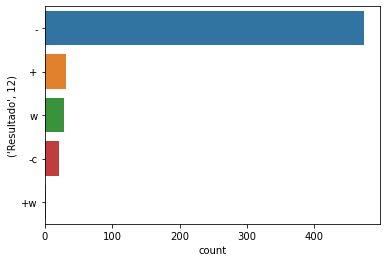

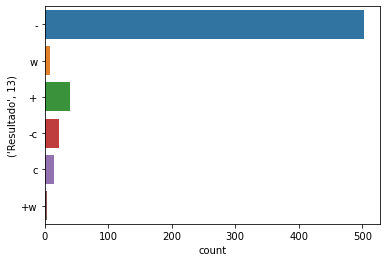

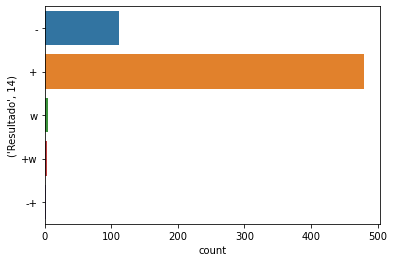

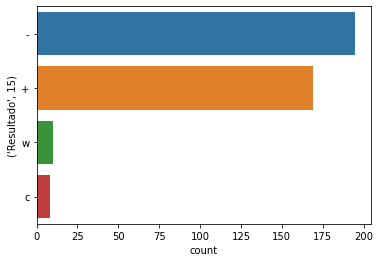

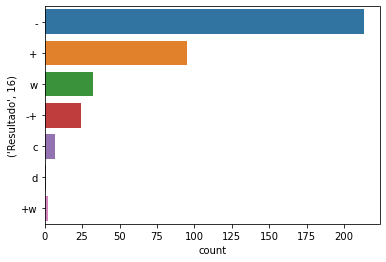

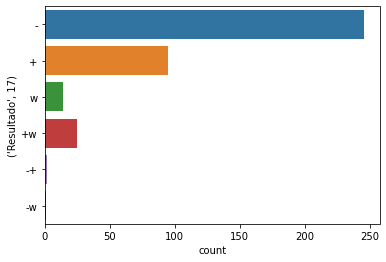

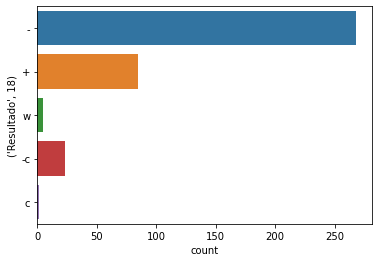

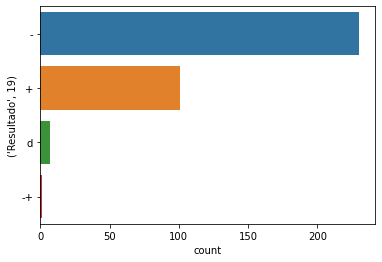

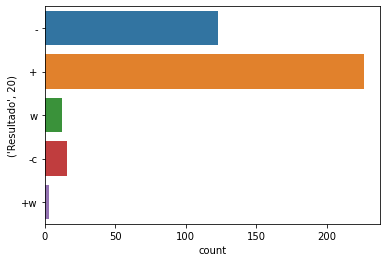

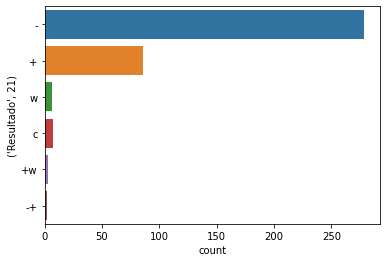

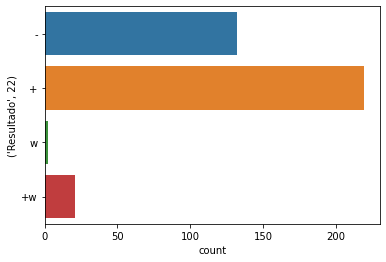

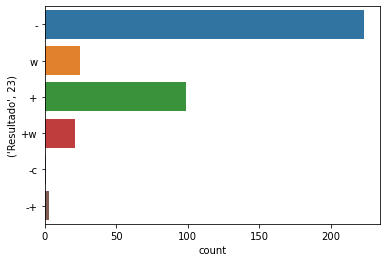

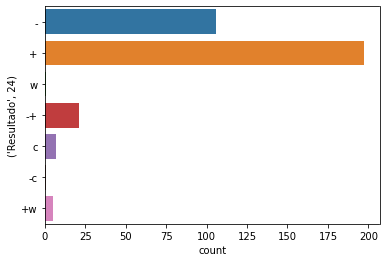

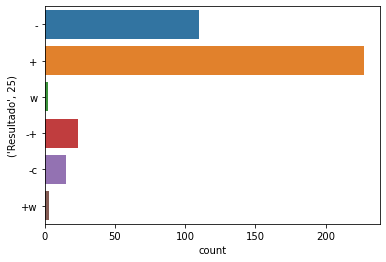

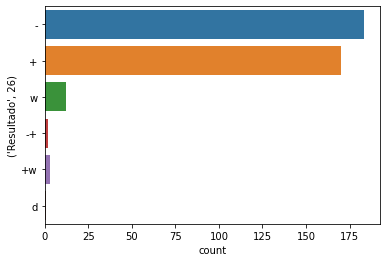

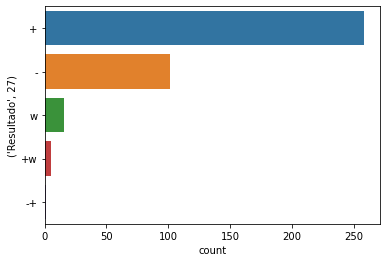

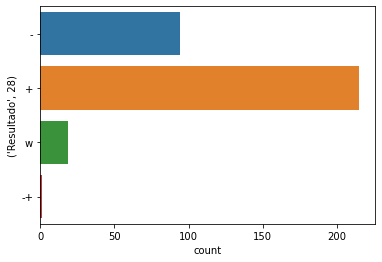

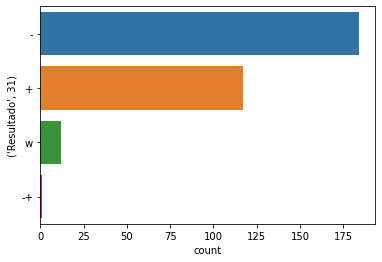

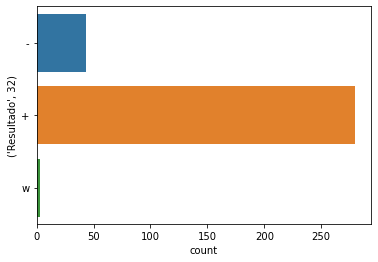

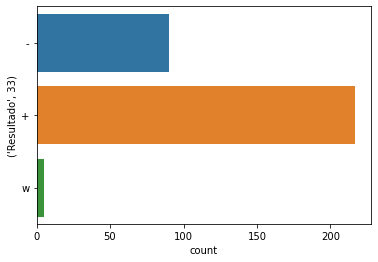

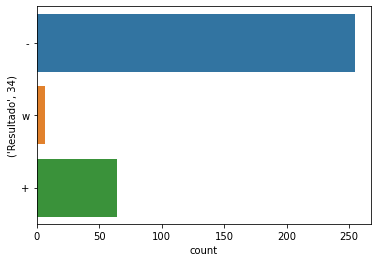

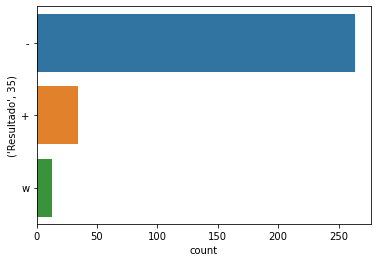

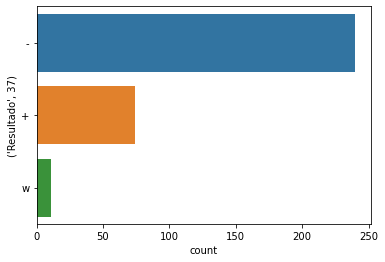

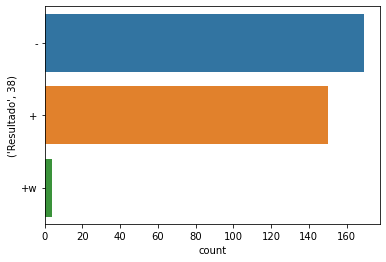

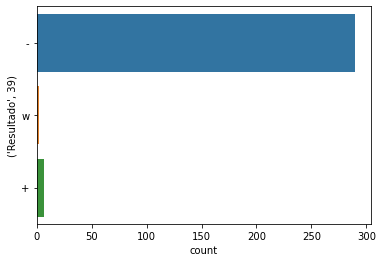

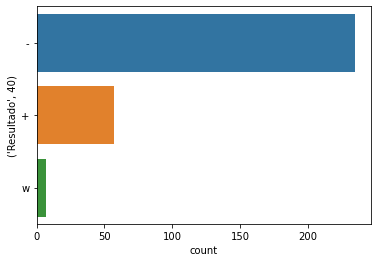

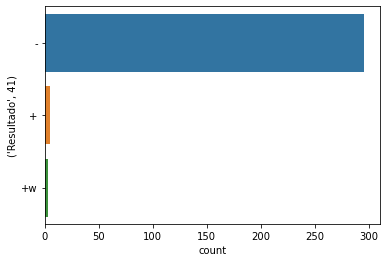

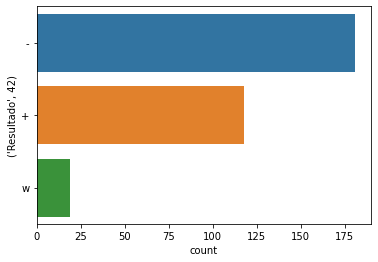

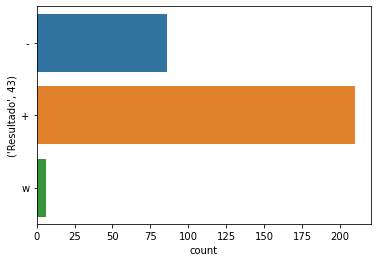

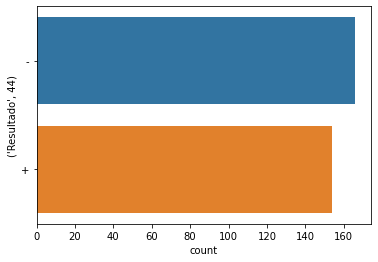

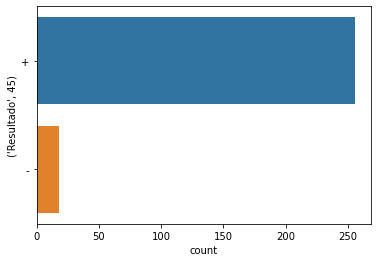

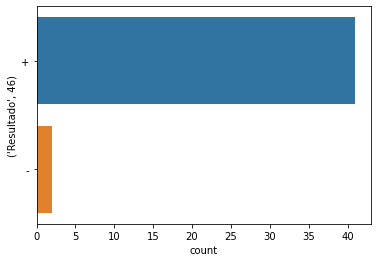

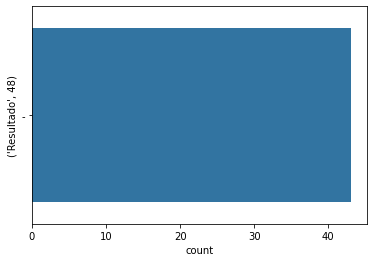

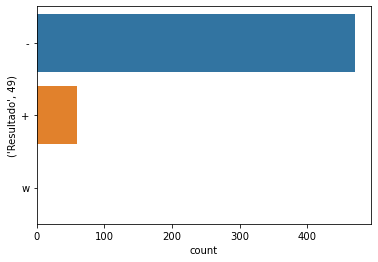

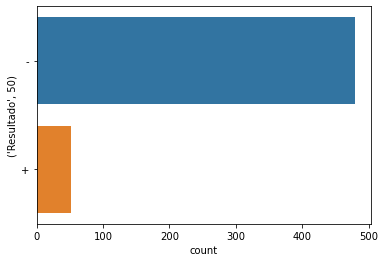

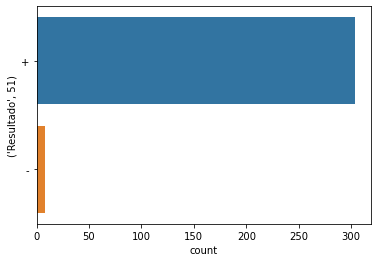

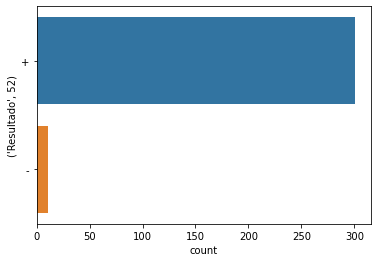

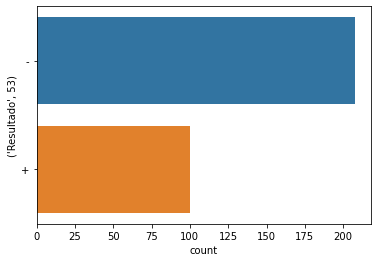

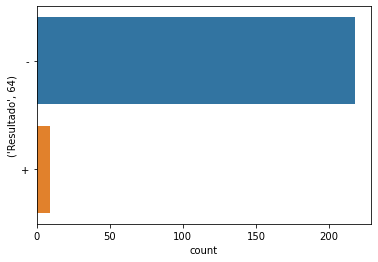

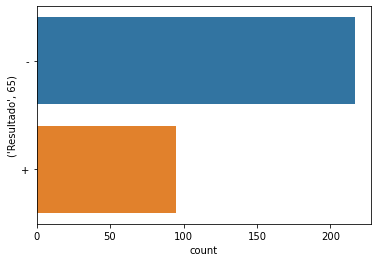

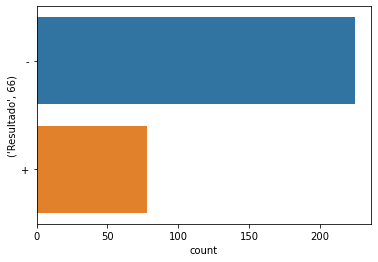

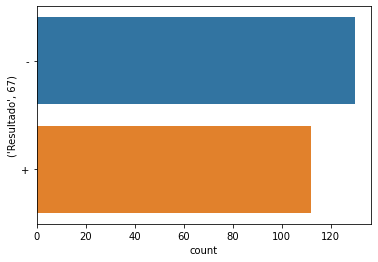

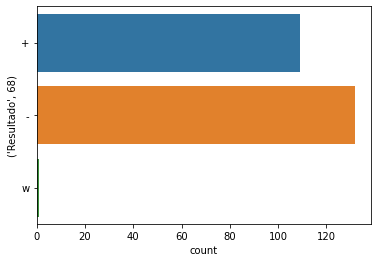

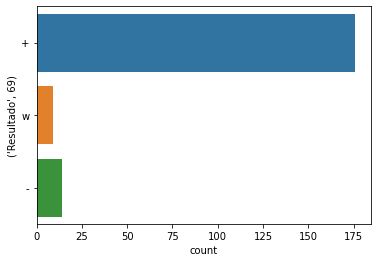

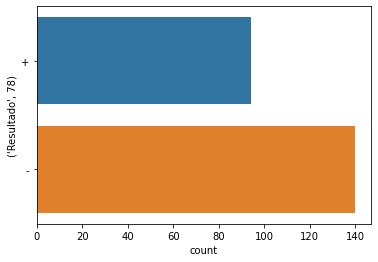

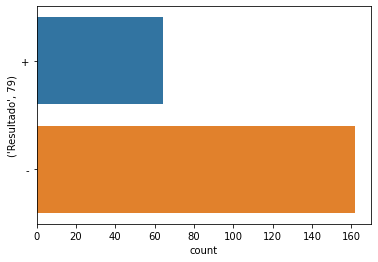

In [13]:
# plota cada característica categorica:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

Are there so many missing values for a variable that you should drop that variable from your dataset?

In [14]:
# remocao das colunas com maioria dos valores nulos:
#df.isnull().sum()
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

           Composto
Resultado  1           95.673877
           2            0.166389
           5            3.660566
           6            0.166389
           8            0.499168
           9            0.998336
           10           0.332779
           11           0.499168
           12           7.487521
           13           1.497504
           14           0.166389
           15          36.439268
           16          37.770383
           17          36.439268
           18          36.439268
           19          43.594010
           20          36.772047
           21          36.439268
           22          37.770383
           23          38.103161
           24          43.760399
           25          36.605657
           26          38.269551
           27          36.605657
           28          45.257903
           31          47.753744
           32          45.757072
           33          48.086522
           34          45.757072
           35          

In [15]:
# mostra colunas com qtd de valores nulos maior que 50% dos possiveis registros: 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 50]

Total  Missing Percent
          Composto                        
Resultado 1           575        95.673877
          48          558        92.845258
          46          558        92.845258
          69          402        66.888519
          79          375        62.396007
          64          374        62.229617
          78          367        61.064892
          67          359        59.733777
          68          359        59.733777
          45          327        54.409318
          39          302        50.249584
          40          302        50.249584

In [16]:
df.sample(5)

Resultado                                   ...            \
Composto               1   2   3   4  5  6   7  8   9   10  ...   52   53   
Isolado                                                     ...             
UFT.2014(L)7781       NaN   +   +   +  +  +   +  -   +   +  ...  NaN  NaN   
UFT.2015(L)8566       NaN  -c  -c   -  -  +   -  -   -   -  ...  NaN  NaN   
UFT.2015(L)8509       NaN   +   +  +w  +  +  -+  -  +w  +w  ...  NaN  NaN   
UFT.2014(L)7199       NaN   +   +   +  +  +   +  -   +   +  ...  NaN  NaN   
UFT.2014(L)7967       NaN   +   -   +  +  +   +  +   -   -  ...    +    -   

                                                         
Composto          64   65   66   67   68   69   78   79  
Isolado                                                  
UFT.2014(L)7781  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
UFT.2015(L)8566  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
UFT.2015(L)8509  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
UFT.2014(L)7199  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
UFT.2014(L)7967    -    +    -    +    +    +    +    +  

[5 rows x 57 columns]

In [17]:
# o dataframe é o mesmo, só eliminei manualmente o identificador "Resultado" e ajeitei o header do arquivo:
data = pd.read_csv('data/03.1 - reacoes_formatadas.csv', index_col=0)
data.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,52,53,64,65,66,67,68,69,78,79
UFT.2014(L)7773,NaN,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UFT.2014(L)7840,NaN,+,+,+,+,+,+,-,+,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UFT.2014(L)7847,NaN,-,+,-,+,-,-,-,-,-,...,+,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
UFT.2014(L)6882,NaN,+,+,+,+,+,+,-,+,+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UFT.2014(L)6793,NaN,-,-,-,-,-,-,-,-,-,...,+,+,-,-,-,+,+,+,-,-


In [20]:
from pandas_profiling import ProfileReport

In [22]:
relatorio_inicial = ProfileReport(data, title="Reações - Relatorio Inicial", correlations={"cramers": {"calculate": False}})

In [23]:
relatorio_inicial.to_widgets()

In [ ]:
relatorio_inicial.to_file("01 - relatorio-inicial_reacoes.html")


Deleta (arbitrariamente) colunas com menos de 50% de preenchimento dos dados:
As colunas com mais de 50% de valores nulos são, respectivamente:
1, 39, 40, 45, 46, 48, 64, 67, 68, 69, 78 e 79;

Logo, ...

In [26]:
# TODO: automatizar/melhorar isso aqui:
colunas_excluir = [ '1', '39', '40', '45', '46', '48', '64', '67', '68', '69', '78', '79' ]
# for coluna in colunas_excluir:

data.drop(columns=colunas_excluir, axis=0, inplace=True)


In [27]:
# dimensao atual, sem os 12 compostos removidos por pela alta taxa de valores em branco:
data.shape


(601, 45)

Verificar colunas com baixa cardinalidade (com cardinalidade igual a 1). Colunas cujos valores não possuem variação não contribuem para algoritmo de agrupamento; 


In [29]:
# apenas um coluna apresenta cardinalidade == 1. Coluna correspondente ao composto 48. 
#Já removido na operação anterior por apresentar 92% dos dados faltantes.


In [ ]:
# salva estado atual da tabela:
# salva estado atual do dataframe em arquivo CSV:
data.to_csv('03.1 - reacoes_col_.csv')